
# S07T01_Hypothesis_Testing
Sprint 7.Task 1. Hypothesis Testing

# TASK STATEMENT:
Learn how to perform hypothesis testing with Python.

Level 1
- Exercise 1  
>Take a data set you like and select an attribute from the data set.  
Calculate the p-value and say whether it disproves the null hypothesis by taking an alpha of 5%. 

Level 2
- Exercise 2  
>Continue with the data set you like and select two other attributes from the data set.  
Calculate the p-values and say whether they disprove the null hypothesis by taking an alpha of 5%.

Level 3 
- Exercise 3  
>Continue with the data set you like and select three attributes from the data set.  
Calculate the p-value and say whether it disproves the null hypothesis by taking an alpha of 5%.


# REFERENCE RESOURCES:
------  
## Steps for Hypothesis testing:  
(🗨️ from  https://towardsdatascience.com/hypothesis-testing-explained-as-simply-as-possible-6e0a256293cf)
![](2022-02-16-12-05-14.png)  

------  
## Explanation of p-value:  
(🗨️ from https://en.wikipedia.org/wiki/P-value)  
![](2022-02-16-12-16-29.png)

------
## Careful, Misuse of p-value:
(🗨️ from https://en.wikipedia.org/wiki/P-value)  
![](2022-02-16-12-23-32.png)

# DATASET INFORMATION:
We are going to select the dataset of the 2022 Hackathon MWC Barcelona (Mobile World Congress)
## 🖥 Challenge
### Background  
Nuwefruit is a startup that seeks to revolutionize the habits of the population by encouraging the consumption of fruit on a daily basis. For this reason, the company specializes in the sale of fruit at home, which thanks to its last mile optimization algorithm allows it to have very low logistics costs. This allows Nuwefruit to sell fruit at a lower price than its competitors. Its catalog is based on the sale of more than 20 types of fruit, which have the best nutritional properties.

### Overview: the dataset and challenge

Two datasets will be used: the first one contains data on Nuwefruit's customers and the other one contains data on the orders placed by them.

The customer dataset 'CLIENT TABLE' contains the following variables:


|Column |Description |
|---------|---------|
|CLIENT ID:|Unique identifier of the customer  
|CLIENT_SEGMENT:|Customer segment  
|AVG CONSO: | Average monthly consumption of the customer calculated at the end of 2020 (in pieces of fruit)
|AVG BASKET SIZE: |Customer's average basket size calculated at the end of 2020 (in pieces of fruit)
|RECEIVED_COMMUNICATION:| 1 = Received promotion of your products / 0 = did not receive it


# EDA - Exploratory Dataset Analysis

In [20]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [21]:
# Import dataset
df_clients = pd.read_csv("mwc22-client_table.csv", decimal = ',')

In [22]:
# Column names cleansing
df_clients.columns = df_clients.columns.str.lower()
df_clients.columns = df_clients.columns.str.replace(" ","_")
df_clients.rename_axis('client_id', inplace=True)
df_clients.columns

Index(['client_id', 'client_segment', 'avg_conso', 'avg_basket_size',
       'received_communication'],
      dtype='object')

In [23]:
# Dataset info
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   client_id               35884 non-null  int64  
 1   client_segment          35884 non-null  int64  
 2   avg_conso               35884 non-null  float64
 3   avg_basket_size         35884 non-null  float64
 4   received_communication  35884 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


In [24]:
# Sort by client_id
df_clients.sort_index(inplace=True)

In [25]:
# Dataset describe
round(df_clients.describe(include='all'),2)

,client_id,client_segment,avg_conso,avg_basket_size,received_communication
count,35884.00,35884.00,35884.00,35884.00,35884.00
mean,27060578.92,3.12,64.53,181.22,0.51
std,8835076.38,1.51,64.38,129.60,0.50
min,18073108.00,1.00,0.83,10.00,0.00
25%,20533114.25,2.00,20.83,100.00,0.00
50%,24621903.00,3.00,50.00,160.00,1.00
75%,32985383.25,4.00,88.17,225.00,1.00
max,48365940.00,6.00,2433.33,3400.20,1.00


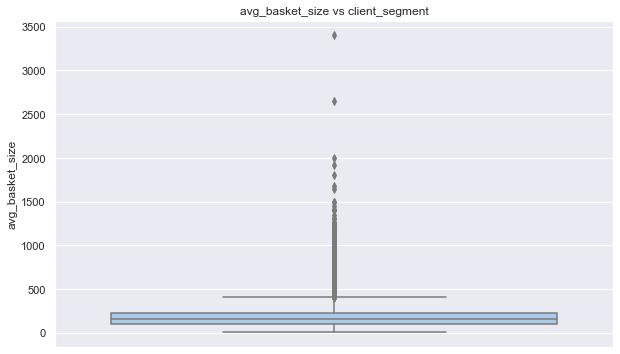

In [26]:
# Plot Boxplot of complete dataset
sns.set_theme(palette="pastel")
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("avg_basket_size vs client_segment")
sns.boxplot(y = 'avg_basket_size',data = df_clients);

# LEVEL 1
## - EXERCISE 1
The attribute that we are going to choose is avg_basket_size  (Customer's average basket size).  
![](2022-02-17-15-52-13.png)  
As seen on describe function, the mean of the avg_basket_size is 181.22 pieces of fruit.  

But, as we see on the boxplot graphic, there are a lot of outlayers that may be distorting the real mean avg_basket_size of the whole population.

Let's plot our data (without outlayers) to see if it follows a normal distribution:

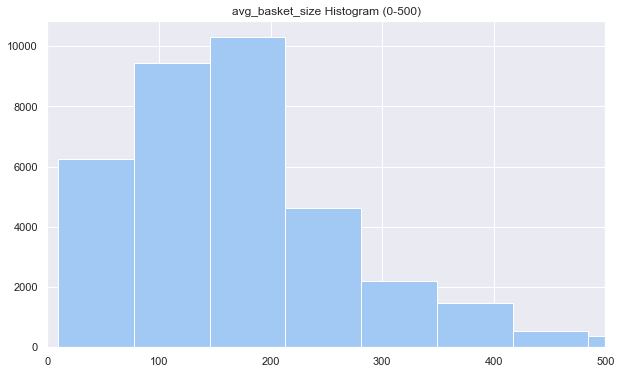

In [42]:
# Plot Histogram just from 0 to 500 avg_basket_size
# Prepare data
data_x = df_clients['avg_basket_size']
# Render
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('avg_basket_size Histogram (0-500)')
ax.set_xlim(0,500)
ax.hist(data_x,bins= 50);
plt.show()

### Hypothesis testing (one variable):

The distribution seems a normal distribution (as per the Histogram plot).  
And with the boxplot graph we have shown that there are quite a lot outlayers.  

* Our **null hypothesis** (or H0) is going to be the logical, that *the mean of the total population is equal o greater than the mean of the sample (181.22)*
* Our **alternative hypothesis** (or HA) is going to be that *the main value of the total population is lower than the actual mean value*  
because we think that the outlayers of the sample have distorted the mean value of sample but in the whole population we expect to be lower.  

Mathematically expressed as:

* H0: µ ≥ 181.22 (the mean avg_basket_size is 181.22 fruits) (sample mean)
* HA: µ < 181.22 (the mean avg_basket_size is less than 181.22 fruits) (because there are many outlayers)

Let's calculate the p-value for this Hypothesis test:

In [28]:
# p-value calculation
result = stats.ttest_1samp(data_x, 181.22, alternative = 'less')
print("The p-value is %.4f" %result.pvalue)

The p-value is 0.4992


### Results interpretation:

* Because the p-value of our test (0.4992) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test.  
**We do not have sufficient evidence to say that the mean avg_basket_size for this particular client's dataset is less than 181.22 fruits.**

# LEVEL 2
## - EXERCISE 2
Let's try now two variables, the **average consummation and promotion received** 
(avg_conso & received_communication)  

![](2022-02-17-15-55-15.png)

First, let's filter the data:

In [29]:
# Filtering data
data_2var = df_clients['avg_conso'] [df_clients['received_communication']== 1]
data_2var

client_id
17655    120.92
17656     50.00
17657     35.00
17658    204.25
17659     33.33
          ...  
35879     12.50
35880     37.50
35881     41.67
35882     62.58
35883     89.17
Name: avg_conso, Length: 18229, dtype: float64

In [30]:
# Getting info (describe) from data
data_2var.describe()

count    18229.000000
mean        75.630256
std         70.082131
min          0.830000
25%         33.330000
50%         59.170000
75%        100.000000
max       2433.330000
Name: avg_conso, dtype: float64

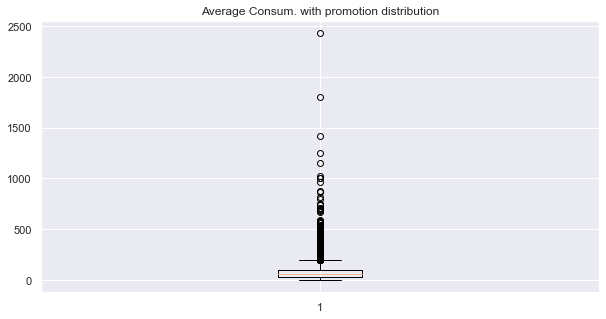

In [31]:
# Boxplot of our data
fig, ax = plt.subplots(figsize=(10,5));
ax.set_title('Average Consum. with promotion distribution')
ax.boxplot(x= data_2var)
plt.show()

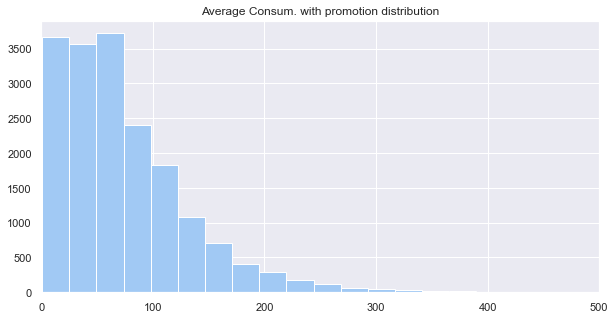

In [32]:
# Historical plot of our data
fig, ax = plt.subplots(figsize=(10,5));
ax.set_xlim(0,500)
ax.set_title('Average Consum. with promotion distribution')
ax.hist(x= data_2var,bins= 100)
plt.show()

### Hypothesis testing (two variables):

As said before, our two variables now are the **average consummation** and **promotion received** (avg_conso & received_communication)   
The distribution seems a normal distribution (as per the Histogram plot).  
And with the boxplot graph we have shown that there are quite a lot outlayers too.  

* Our **null hypothesis** (or H0) is going to be the logical, that *the mean of the total population is equal o greater than the mean of the sample (75.63 fruits)*
* Our **alternative hypothesis** (or HA) is going to be that *the main value of the total population is lower than the actual mean value*  
because we think that the outlayers of the sample have again distorted the mean value of sample but in the whole population we expect to be lower.  

Mathematically expressed as:

* H0: µ ≥ 75.63 (the mean avg_conso of clients with promotion is 75.63 fruits) (sample mean)
* HA: µ < 75.63 (the mean avg_conso of clients with promotion is less than 75.63 fruits) (because there are many outlayers)

Again, we think that the mean value may be artificially high because of the outlayers.

Let's calculate the p-value for this hypotheses:

In [33]:
# p-value calculation
result = stats.ttest_1samp(data_2var, 75.63, alternative = 'less')
print("The p-value is %.4f" %result.pvalue)

The p-value is 0.5002


### Results interpretation:

* Because the p-value of our test (0.50) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test.  
**We do not have sufficient evidence to say that the mean avg_conso of clients with promotion's dataset is less than 75.63 fruits.**

# LEVEL 3 
## - EXERCISE 3
Let's try now three variables, **the average consummation without promotion received in client segment 3**.   
(avg_conso & received_communication == 0 & client_segment == 3) 

![](2022-02-17-15-55-56.png) 

First, let's filter the data:

In [34]:
# Filtering data
data_3var = df_clients['avg_conso'] [df_clients['received_communication']== 0][df_clients['client_segment'] == 3]
data_3var

client_id
2        46.67
6        58.33
12       20.83
15       35.00
18       34.58
         ...  
17639    45.83
17645    50.00
17647    45.58
17652    42.50
17654    37.50
Name: avg_conso, Length: 3699, dtype: float64

In [35]:
# Getting info (describe) from data
data_3var.describe()

count    3699.000000
mean       39.077983
std        13.121105
min        10.000000
25%        33.330000
50%        37.920000
75%        47.250000
max       151.670000
Name: avg_conso, dtype: float64

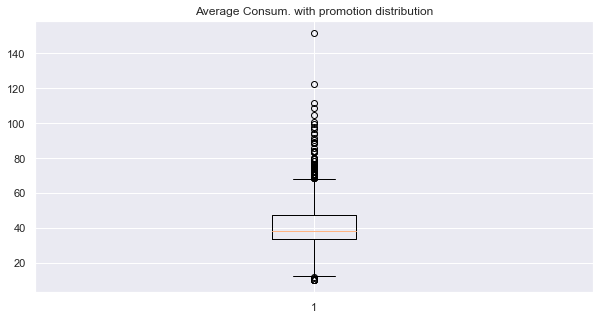

In [36]:
# Boxplot of our data
fig, ax = plt.subplots(figsize=(10,5));
ax.set_title('Average Consum. with promotion distribution')
ax.boxplot(x= data_3var)
plt.show()

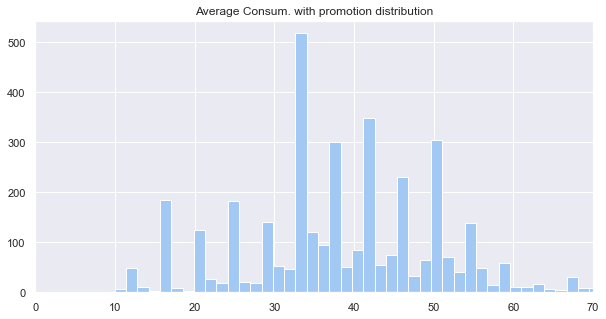

In [37]:
# Historical plot of our data
fig, ax = plt.subplots(figsize=(10,5));
ax.set_xlim(0,70)
ax.set_title('Average Consum. with promotion distribution')
ax.hist(x= data_3var,bins= 100)
plt.show()

### Hypothesis testing (three variables):

As said before, our three variables now are **the average consummation without promotion received in client segment 3**.   
(avg_conso & received_communication == 0 & client_segment == 3)   
The distribution seems a normal distribution (as per the Histogram plot).  
And with the boxplot graph we have shown that there are quite a lot outlayers too.  

* Our **null hypothesis** (or H0) is going to be the logical, that *the mean of the total population is equal or greater than the mean of the sample (39.07 fruits)*
* Our **alternative hypothesis** (or HA) is going to be that *the main value of the total population is lower than the actual mean value*  
because we think that the outlayers of the sample have again distorted the mean value of sample but in the whole population we expect to be lower.  

Mathematically expressed as:

* H0: µ ≥ 39.07 (the mean avg_conso of clients with promotion is 39.07 fruits) (sample mean)
* HA: µ < 39.07 (the mean avg_conso of clients with promotion is less than 39.07 fruits) (because there are many outlayers)

Again, we think that the mean value may be artificially high because of the outlayers.

Let's calculate the p-value for this hypotheses:

In [38]:
# p-value calculation
result = stats.ttest_1samp(data_3var, 39.07, alternative = 'less')
print("The p-value is %.4f" %result.pvalue)

The p-value is 0.5148


### Results interpretation:

* Because the p-value of our test (0.51) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test.  
**We do not have sufficient evidence to say that the dataset of *average consummation without promotion in client segment 3* is less than 39.07 fruits.**